### **Final Project: Support Vector Machine**

> **Student name:**  *(이예이)*

> **Student ID:** *(2018315065)*

### **1. Access to the Dog Cat data**

First, you need to **upload** the  **`cats_and_dogs_small.zip`** file to your Google Drive in the folder **Colab Notebooks**

Then on the left  Tool bar, select **`Files`** $\rightarrow$ **`Mount Drive`**

Then we need to unzip our data to the folder `/content`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the our data
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small.zip"  -d "/content"

In [ ]:
# Set the directories to training, validation and test data
train_data_path = './cats_and_dogs_small/train/'
validation_data_path = './cats_and_dogs_small/validation/'
test_data_path = './cats_and_dogs_small/test/'

In [ ]:
# List out all image file name in the folders
from glob import glob # This library used to get all file in folder
from tqdm import tqdm # This lbrary used to show progress bar
import numpy as np
import cv2
width = 32 # Reshape image to new width
height = 32 # Reshape image to new height

def get_img_file(directory):
  """
  Get all dogs and cats file name in the directory, label dogs as 0s and cats as 1s
  """
  dog_list = glob(directory + "dogs/*.jpg")
  cat_list = glob(directory + "cats/*.jpg")
  file_list = dog_list + cat_list
  
  dog_lb = [0] * len(dog_list)
  cat_lb = [1] * len(cat_list)
  label_list = dog_lb+cat_lb

  num_imgs = len(label_list)
  imgs = np.zeros((num_imgs, width, height, 3), dtype=np.int16)

  for idx, file in tqdm(enumerate(file_list)):
    img_bgr = cv2.imread(file) # Read image
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_rgb, (width, height), interpolation = cv2.INTER_AREA) # Resize image
    imgs[idx] = img_resize

  return imgs, np.array(label_list)

train_imgs, train_lbs = get_img_file(train_data_path)
val_imgs, val_lbs = get_img_file(validation_data_path)
test_imgs, test_lbs = get_img_file(test_data_path)

2000it [00:06, 288.87it/s]
1000it [00:03, 288.28it/s]
1000it [00:03, 298.80it/s]


### **2. Visualize some random images in training set**

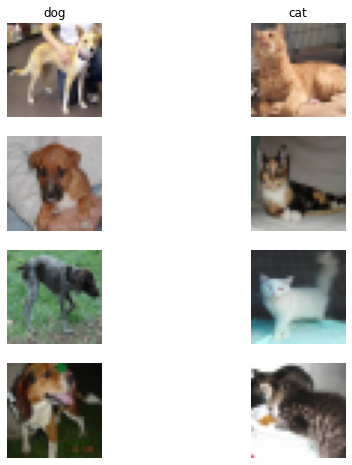

In [ ]:
from matplotlib import pyplot as plt
classes = ['dog', 'cat']
num_classes = len(classes)
samples_per_class = 4
plt.figure(figsize=(8,8))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_lbs == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_imgs[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


### **3. Transform the dataset**
**Question 1.** Our (train / val / test) input data have the shape of 4-D matrix `num_images x width x height x 3`, where 3 is the number of channels of each imag (Red, Green and Blue channel). 
To fix into our SVM model, you are asked to to transform each of train / val / test dataset to a 2D matrix `num_images x F`, where `F = width x height x 3`. Note: only use `numpy` library. *(20 points)*

In [ ]:
print('Training data shape: ', train_imgs.shape)
print('Validation labels shape: ', val_imgs.shape)
print('Test data shape: ', test_imgs.shape)

Training data shape:  (2000, 32, 32, 3)
Validation labels shape:  (1000, 32, 32, 3)
Test data shape:  (1000, 32, 32, 3)


In [ ]:
# Transform shape of train / val / test data
import numpy as np
train_imgs_trans = np.reshape (train_imgs, (2000,3072))
val_imgs_trans = np.reshape(val_imgs, (1000,3072))
test_imgs_trans = np.reshape(test_imgs, (1000,3072))
#     e.g.:  train_imgs_trans has shape of (2000, 3072),
#            val_imgs_trans has shape of (1000, 3072)
#            test_imgs_trans has shape of (1000, 3072)       
# ========================================

In [ ]:
# Sanity check new shape of input data
print(train_imgs_trans.shape == (len(train_imgs), width*height*3))
print(val_imgs_trans.shape == (len(val_imgs), width*height*3)) 
print(test_imgs_trans.shape == (len(test_imgs), width*height*3))

True
True
True


**Question 2.** Now, to normalize the data, you are asked to calculate the mean of training data set. The mean vector will have the shape of `F`. And then subtract the mean from the training / val / test dataset. *(10 points)*

In [ ]:
# Obtain the mean vector of training set
v_mean = np.mean (train_imgs,axis=0)
train_mean = np.reshape (v_mean,(3072,))
#           Write your code here
#     e.g.:  train_mean has shape of (3072,)       
# ========================================


# Sanity check shape of mean vector
print(train_mean.shape == (width*height*3,))

# Subtract mean from train / val / test
train_imgs_norm = train_imgs_trans - train_mean
val_imgs_norm = val_imgs_trans - train_mean
test_imgs_norm = test_imgs_trans - train_mean

True


### **3. Support Vector Machine**
In this section, you will build three different SVM models using different kernel, and report the acucracy on the validation data.

#### 3.1 Support vector machine with `linear` kernel
**Question 3.** What is the accuracy of *validation set* of SVM model with `linear` kernel, regularization parameter `C = 1.5`? *(20 points)*
> **Answer.** *(write your answer here)*

In [ ]:
# Fit SVM with linear kernel on training data 
import numpy as np
from sklearn.svm import SVC
X = train_imgs_norm 
y = train_lbs 
s1= SVC(kernel = 'linear', C = 1.5)
s1.fit(X,y) 
w = s1.coef_
b = s1.intercept_
print('w = ', w)
print('b = ', b)




w =  [[-0.00061214 -0.00437479 -0.00108123 ... -0.00133825 -0.00105844
   0.00069577]]
b =  [0.0009126]


In [ ]:
# Predict and print accuracy on validation set
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
X = val_imgs_norm
y = val_lbs
y_pred = s1.predict(X)
y_true = y
acc = accuracy_score(y_true,y_pred)
print("Accuracy: {:.1f}%".format( acc * 100))


Accuracy: 56.6%


#### 3.2 Support vector machine with `rbf` kernel
**Question 4.** What is the accuracy of *validation set* of SVM model with `rbf` kernel,  regularization parameter `C = 1.5`? *(20 points)*
> **Answer.** *(.937)*

In [ ]:
# Fit SVM with rbf kernel on training data 

import numpy as np
from sklearn.svm import SVC
X = train_imgs_norm 
y = train_lbs 
s2= SVC(kernel = 'rbf', C = 1.5)
s2.fit(X,y) 



SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predict and print accuracy on validation set
y_pred = s2.predict(X)
y_true = y
acc = accuracy_score(y_true,y_pred)
print("Accuracy: {:.1f}%".format( acc * 100))


Accuracy: 93.7%


#### 3.3 Support vector machine with `poly` kernel
**Question 5.** What is the accuracy on the *validation set* of SVM model with `poly` kernel, regularization parameter `C = 1.5`? *(20 points)*
> **Answer.** *(.945)*

In [ ]:
# Fit SVM with poly kernel on training data 

import numpy as np
from sklearn.svm import SVC
X = train_imgs_norm 
y = train_lbs 
s3= SVC(kernel = 'poly', C = 1.5)
s3.fit(X,y) 


SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predict and print accuracy on validation set
y_pred = s3.predict(X)
y_true = y
acc = accuracy_score(y_true,y_pred)
print("Accuracy: {:.1f}%".format( acc * 100))



Accuracy: 94.5%


#### 3.4 Test phase
**Question 6.** (a) Which of the three models above have the best performance on validation set? Then, apply the best model to predict on the test set. (b) What is the accuracy of your best model on the test set? *(10 points)*
> **Answer.** *(.939)*

In [ ]:
# Using the best SVM model to predict on the test set
import numpy as np
from sklearn.svm import SVC

import numpy as np
from sklearn.svm import SVC
X = test_imgs_norm
y = test_lbs
s4= SVC(kernel = 'poly', C = 1.5)
s4.fit(X,y)


y_pred = s4.predict (X)
y_true = y
acc=accuracy_score (y_true, y_pred)
print ('Accuracy :{:.1f}%'.format (acc*100))


Accuracy :93.9%


In this project, we had gone through the use of training, validation and test set, and how to utilize them to develop a machine learning model. In fact, we can fine-tune the model more by changing its hyper-parameters.

### **Submission.** 
After finish all the questions, to create a submission file: on the top tool bar, select **File** $\rightarrow$ **Print**, at **Detination** select **Save as PDF**. \\
Finally, **only upload your PDF file on iCampus.**